In [ ]:
!pip install selenium
!pip install webdriver-manager
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install squarify
!pip install scikit-learn


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service) 

In [3]:
df = pd.DataFrame(columns=["Product_Name","Price", "Pre_price","Monthly_Purchases","Ratings"])
for i in range(1,151):
    print(f"🔎 Scraping page {i}...")
    driver.get(f"https://www.amazon.eg/s?i=grocery&rh=n%3A18020637031&s=popularity-rank&fs=true&page={i}&language=en&qid=1764163821&xpid=IqAWXF4eov56s&ref=sr_pg_{i}")
    wait = WebDriverWait(driver, 5)
    products = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,".a-section.a-spacing-base.desktop-grid-content-view")))
    Products_Name, Prices, Pre_prices, Monthly_Purchases,Ratings = [], [], [], [], []
    for product in products:
        try:
            name = product.find_element(By.CSS_SELECTOR,".a-size-base-plus.a-spacing-none.a-color-base.a-text-normal").text
            Products_Name.append(name)
        except:
            Products_Name.append(pd.NA)
        try:
            price = product.find_element(By.CLASS_NAME,"a-price").text
            Prices.append(price)
        except:
            Prices.append(pd.NA)
        try:
            pre_price = product.find_element(By.CSS_SELECTOR,".a-price.a-text-price").text
            Pre_prices.append(pre_price)
        except:
            Pre_prices.append(pd.NA)
        try:
            Monthly_Purchase = product.find_element(By.CSS_SELECTOR,".a-size-base.a-color-secondary").text
            Monthly_Purchases.append(Monthly_Purchase)
        except:
            Monthly_Purchases.append(pd.NA)            
        try:
            rating = product.find_element(By.CSS_SELECTOR,".a-size-small.a-color-base").text
            Ratings.append(rating)
        except:
            Ratings.append(pd.NA)
            
            
    df2 =pd.DataFrame({
    "Product_Name": Products_Name,
    "Price": Prices,
    "Pre_price":Pre_prices,
    "Monthly_Purchases":Monthly_Purchases,
    "Ratings":Ratings,
})
    
    df = pd.concat([df, df2], ignore_index=True)

            
            
            

    

🔎 Scraping page 1...
🔎 Scraping page 2...
🔎 Scraping page 3...
🔎 Scraping page 4...
🔎 Scraping page 5...
🔎 Scraping page 6...
🔎 Scraping page 7...
🔎 Scraping page 8...
🔎 Scraping page 9...
🔎 Scraping page 10...
🔎 Scraping page 11...
🔎 Scraping page 12...
🔎 Scraping page 13...
🔎 Scraping page 14...
🔎 Scraping page 15...
🔎 Scraping page 16...
🔎 Scraping page 17...
🔎 Scraping page 18...
🔎 Scraping page 19...
🔎 Scraping page 20...
🔎 Scraping page 21...
🔎 Scraping page 22...
🔎 Scraping page 23...
🔎 Scraping page 24...
🔎 Scraping page 25...
🔎 Scraping page 26...
🔎 Scraping page 27...
🔎 Scraping page 28...
🔎 Scraping page 29...
🔎 Scraping page 30...
🔎 Scraping page 31...
🔎 Scraping page 32...
🔎 Scraping page 33...
🔎 Scraping page 34...
🔎 Scraping page 35...
🔎 Scraping page 36...
🔎 Scraping page 37...
🔎 Scraping page 38...
🔎 Scraping page 39...
🔎 Scraping page 40...
🔎 Scraping page 41...
🔎 Scraping page 42...
🔎 Scraping page 43...
🔎 Scraping page 44...
🔎 Scraping page 45...
🔎 Scraping page 46.

In [4]:
df["Brand"] = df["Product_Name"].apply(
    lambda x: " ".join(str(x).split()[:2])
)


Web Scraping (Data collection)
In this project, I performed web scraping on the Amazon Egypt (Grocery category) to collect product information for analysis. The scraping was done using Python, mainly with the Selenium library. Below is a detailed explanation of the steps I followed:
1. Libraries Installation and Setup
I started by installing the required libraries:
• selenium for web automation
• webdriver-manager to automatically download the correct ChromeDriver
• pandas for storing and organizing the scraped data
Then, I initialized the Chrome WebDriver using ChromeDriverManager() so I could interact with web pages automatically.
2. Creating the Data Structure
I created an empty Pandas DataFrame with the following columns:
• Product_Name
• Price
• Pre_price
• Monthly_Purchases
• Ratings
This structure was used to store all data collected during scraping. Later, I also added a new Brand column by extracting the first two words from each product name to help identify the product brands.
3. Scraping Multiple Pages
I scraped 150 pages from the Grocery section on Amazon. Inside a loop, the script opened each page’s URL using driver.get(), then waited until the product elements fully loaded using WebDriverWait.
4. Extracting Product Information
For each product on the page, I extracted the following details using CSS selectors:
• Product Name: extracted from the product title element
• Current Price: taken from the .a-price element
• Previous Price: scraped when available from the price strike-through section
• Monthly Purchases: collected from the element showing “X bought this month”
• Ratings: taken from the rating text if available
Every extraction was wrapped in a try–except block to avoid errors when a field was missing. If a value wasn't found, I stored it as NA.
5. Building the Final Dataset
After scraping each page, I created a temporary DataFrame for that page and then concatenated it with the main DataFrame. By the end of the loop, I had a complete dataset containing all products from all 150 pages.
Final Output
The result of this process is a combined dataset that includes product names, prices, old prices, monthly purchase counts, ratings and brand. This dataset can now be used for analysis, visualization, or any further data processing tasks.

In [5]:
df

,Product_Name,Price,Pre_price,Monthly_Purchases,Ratings,Brand
0,"Lipton Black Tea Soft , 500 gm",EGP105\n00,<NA>,10K+ bought in past month,4.4,Lipton Black
1,JUHAYNA Carton Full Cream Milk Multipack 1 L U...,EGP295\n00,<NA>,10K+ bought in past month,4.5,JUHAYNA Carton
2,"Al Doha Egyptian Flour, 1 kg (Pack of 1)",EGP24\n95,EGP33.00,7K+ bought in past month,4.6,Al Doha
3,Al Doha Egyptian Rice-1 kg,EGP37\n95,EGP42.95,9K+ bought in past month,4.6,Al Doha
4,"Afia sunflower oil, 2.2 liters",EGP203\n45,EGP212.63,6K+ bought in past month,4.6,Afia sunflower
...,...,...,...,...,...,...
4045,ONIC Premium Ground Cumin – 125g | 100% Natura...,EGP87\n00,<NA>,10% off NBE Visa Signature Credit Cards,<NA>,ONIC Premium
4046,Trident Strawberry Sugar free Chewing Gum - 7 ...,EGP180\n00,<NA>,10% off NBE Visa Signature Credit Cards,<NA>,Trident Strawberry
4047,LIPTON EXS GRN TEA&INTENS MINT,EGP85\n00,EGP107.44,Was:,4.6,LIPTON EXS
4048,Davidoff Café Grande Cuvee Fine Aroma Coffee -...,EGP399\n00,<NA>,300+ bought in past month,4.5,Davidoff Café


In [10]:
df.head(20)

,Product_Name,Price,Pre_price,Monthly_Purchases,Ratings,Brand
0,"Lipton Black Tea Soft , 500 gm",EGP105\n00,<NA>,10K+ bought in past month,4.4,Lipton Black
1,JUHAYNA Carton Full Cream Milk Multipack 1 L U...,EGP295\n00,<NA>,10K+ bought in past month,4.5,JUHAYNA Carton
2,"Al Doha Egyptian Flour, 1 kg (Pack of 1)",EGP24\n95,EGP33.00,7K+ bought in past month,4.6,Al Doha
3,Al Doha Egyptian Rice-1 kg,EGP37\n95,EGP42.95,9K+ bought in past month,4.6,Al Doha
4,"Afia sunflower oil, 2.2 liters",EGP203\n45,EGP212.63,6K+ bought in past month,4.6,Afia sunflower
5,Nescafe Classic Instant Coffee Pouch 200g,EGP233\n25,EGP260.00,9K+ bought in past month,4.5,Nescafe Classic
6,"Elano water bottle, 12 pieces - 1.50 liter Pac...",EGP82\n95,EGP103.00,6K+ bought in past month,3.9,Elano water
7,"Lipton Green Tea Mint, 25 teabags",EGP28\n00,EGP35.00,5K+ bought in past month,4.5,Lipton Green
8,Helwa mixed oil - 2.25 l,EGP157\n95,<NA>,3K+ bought in past month,4.5,Helwa mixed
9,AL SA`A El Egyptian White Rice - 1 Kg,EGP33\n50,<NA>,3K+ bought in past month,4.5,AL SA`A


In [ ]:
df.to_csv("Final_Data.csv", index=False)

##Dataset Overview

The dataset contains product-related information collected from an online store.
It includes 4,050 records before cleaning and consists of the following features:

Product_Name:
A text feature representing the full name of the product.

Price:
A numerical feature indicating the current product price (in EGP).

Pre_price:
A numerical feature showing the original price of the product before any discount.

Monthly_Purchases:
A numerical feature representing how many times the product is purchased per month.

Ratings:
A numerical feature that reflects the customer rating of the product (from 1 to 5).

Brand:
A categorical feature representing the brand or manufacturer of the product.

In [4]:
df = pd.read_csv(r"D:\Uni_Projects\Mehodology_Project\Final_Data.csv")

In [5]:
print(df.head())
print(df.tail())
print(df.info())          
print(df.columns)              
print(df.describe()) 
print(df.isnull().sum()) 
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

                                        Product_Name       Price  Pre_price  \
0                     Lipton Black Tea Soft , 500 gm  EGP105\n00        NaN   
1  JUHAYNA Carton Full Cream Milk Multipack 1 L U...  EGP295\n00        NaN   
2           Al Doha Egyptian Flour, 1 kg (Pack of 1)   EGP24\n95   EGP33.00   
3                         Al Doha Egyptian Rice-1 kg   EGP37\n95   EGP42.95   
4                     Afia sunflower oil, 2.2 liters  EGP203\n45  EGP212.63   

           Monthly_Purchases  Ratings           Brand  
0  10K+ bought in past month      4.4    Lipton Black  
1  10K+ bought in past month      4.5  JUHAYNA Carton  
2   7K+ bought in past month      4.6         Al Doha  
3   9K+ bought in past month      4.6         Al Doha  
4   6K+ bought in past month      4.6  Afia sunflower  
                                           Product_Name       Price  \
4045  ONIC Premium Ground Cumin – 125g | 100% Natura...   EGP87\n00   
4046  Trident Strawberry Sugar free Chewing Gum

##Data Inspection and Identified Issues
During the inspection process, several issues were observed in the dataset:
•	Missing Values: Price had 233 missing values, Pre_price had 3,099 missing values, Monthly_Purchases had 90 missing values, and Ratings had 226 missing values.
•	Incorrect Data Types: Price, Pre_price, and Monthly_Purchases were stored as text instead of numeric values.
•	Formatting Issues: Prices contained text such as 'EGP', newline characters, and commas.
•	Inconsistent Monthly Purchases: Some values contained 'K' to represent thousands.
•	Duplicate Records: The dataset contained 446 duplicate rows.
•	Unclean Text Data: Product names and brand names contained extra spaces and newline characters.

In [6]:
# Product_Name
df["Product_Name"] = (
    df["Product_Name"]
    .str.replace("\n", " ", regex=False)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .astype('string') 
)

In [7]:
# Price
df['Price'] = (
    df['Price']
    .str.replace('EGP', '', regex=False)
    .str.replace('\n', '.', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)

In [8]:
# Pre_price
df['Pre_price'] = (
    df['Pre_price']
    .str.replace('EGP', '', regex=False)
    .str.replace('\n', '.', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)

In [9]:
# Monthly_Purchases
def extract_purchases(x):
    if isinstance(x, str):
        # لو فيها K
        if 'K' in x:
            num = re.findall(r'\d+', x)
            if num:
                return int(num[0]) * 1000
        # لو رقم عادي
        num = re.findall(r'\d+', x)
        if num:
            return int(num[0])
    return None  # قيم ملهاش علاقة بالشراء

df['Monthly_Purchases'] = df['Monthly_Purchases'].apply(extract_purchases)
df['Monthly_Purchases'] = df['Monthly_Purchases'].astype('float')

In [10]:
# Ratings
df['Ratings'] = df['Ratings'].fillna(0)

In [11]:
# Brand
df['Brand'] = df['Brand'].str.strip().astype('string')

In [12]:
df = df.dropna(subset=['Price', 'Monthly_Purchases'])
df['Monthly_Purchases'] = df['Monthly_Purchases'].astype('int64')
df = df.drop(columns=['Pre_price'])
df = df.drop_duplicates()

In [13]:
print(df.head())
print(df.tail())
print(df.info())          
print(df.columns)              
print(df.describe()) 
print(df.isnull().sum()) 
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

                                        Product_Name   Price  \
0                     Lipton Black Tea Soft , 500 gm  105.00   
1  JUHAYNA Carton Full Cream Milk Multipack 1 L U...  295.00   
2           Al Doha Egyptian Flour, 1 kg (Pack of 1)   24.95   
3                         Al Doha Egyptian Rice-1 kg   37.95   
4                     Afia sunflower oil, 2.2 liters  203.45   

   Monthly_Purchases  Ratings           Brand  
0              10000      4.4    Lipton Black  
1              10000      4.5  JUHAYNA Carton  
2               7000      4.6         Al Doha  
3               9000      4.6         Al Doha  
4               6000      4.6  Afia sunflower  
                                           Product_Name   Price  \
4040  Mr Beast Feastables Milk Chocolate Bar – Grass...  550.00   
4042                          Abu Auf Mixed Nuts 500 gm  599.99   
4043  عرض 2 عبوة مسحوق حليب الشوك الغني بالسيليمارين...  235.00   
4045  ONIC Premium Ground Cumin – 125g | 100% Natura...   8

In [14]:
df.to_csv("Cleaned_Data.csv", index=False)

##Dataset Before and After Cleaning
Before Cleaning:
•	Number of rows: 4,050
•	Number of columns: 6
•	Data types were mostly object/string.
•	Missing values existed in multiple columns.
•	Duplicate rows: 446

After Cleaning:
•	Number of rows: 3,098
•	Number of columns: 5 (Pre_price column removed).
•	All numerical columns converted to proper numeric data types.
•	All missing values in key columns removed.
•	All duplicate records removed.
•	Product names and brand names cleaned and standardized.
•	Monthly purchases converted to uniform numerical values

In [15]:
df = pd.read_csv(r"D:\Uni_Projects\Mehodology_Project\Cleaned_Data.csv")

In [16]:
df

,Product_Name,Price,Monthly_Purchases,Ratings,Brand
0,"Lipton Black Tea Soft , 500 gm",105.00,10000,4.4,Lipton Black
1,JUHAYNA Carton Full Cream Milk Multipack 1 L U...,295.00,10000,4.5,JUHAYNA Carton
2,"Al Doha Egyptian Flour, 1 kg (Pack of 1)",24.95,7000,4.6,Al Doha
3,Al Doha Egyptian Rice-1 kg,37.95,9000,4.6,Al Doha
4,"Afia sunflower oil, 2.2 liters",203.45,6000,4.6,Afia sunflower
...,...,...,...,...,...
3093,Mr Beast Feastables Milk Chocolate Bar – Grass...,550.00,10,3.6,Mr Beast
3094,Abu Auf Mixed Nuts 500 gm,599.99,10,3.4,Abu Auf
3095,عرض 2 عبوة مسحوق حليب الشوك الغني بالسيليمارين...,235.00,10,2.6,عرض 2
3096,ONIC Premium Ground Cumin – 125g | 100% Natura...,87.00,10,0.0,ONIC Premium


-- This visualization displays the distribution of product prices using a histogram with a KDE curve to show both frequency and overall density trends.

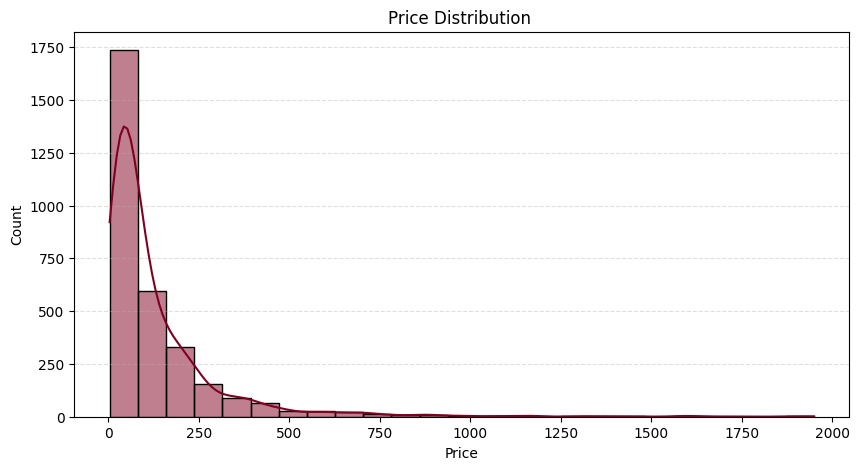

In [17]:
#Histogram with KDE
plt.figure(figsize=(10,5))                      
sns.histplot(df['Price'], bins=25, kde=True ,color='#800020')     
plt.title('Price Distribution ')                
plt.xlabel('Price')                             
plt.ylabel('Count')                              
plt.grid(axis='y', linestyle='--', alpha=0.4)   
plt.show()

-- This boxplot visualizes the distribution of product prices, highlighting the median, spread, and potential outliers.

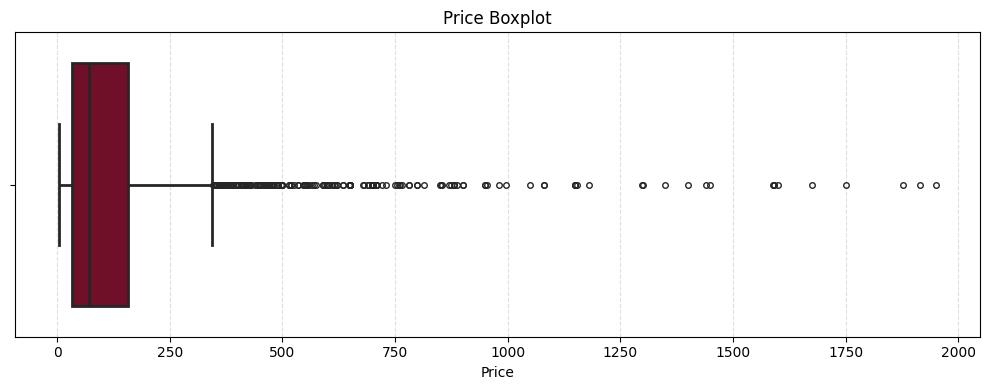

In [18]:
#Boxplot
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Price'],color='#800020',fliersize=4,linewidth=2)
plt.title('Price Boxplot')
plt.xlabel('Price')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

-- This scatterplot shows the relationship between product price and monthly purchases, helping identify trends or correlations between the two variables.

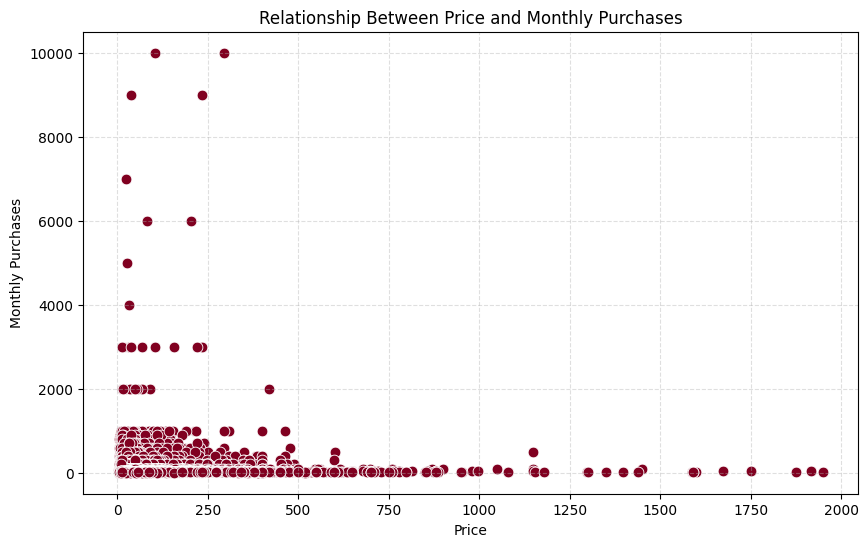

In [19]:
#Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Price',y='Monthly_Purchases',color='#800020',s=60)
plt.title('Relationship Between Price and Monthly Purchases')
plt.xlabel('Price')
plt.ylabel('Monthly Purchases')
plt.grid(linestyle='--', alpha=0.4)
plt.show()


-- This heatmap illustrates the correlation between key numerical features, showing how strongly each pair of variables is related.

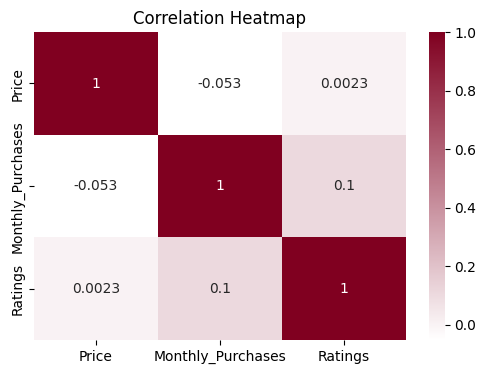

In [20]:
#Correlation Heatmap
from matplotlib.colors import LinearSegmentedColormap
burgundy_cmap = LinearSegmentedColormap.from_list("burgundy",["#ffffff", "#800020"] )
plt.figure(figsize=(6,4))
corr = df[['Price', 'Monthly_Purchases', 'Ratings']].corr()
sns.heatmap(corr, annot=True, cmap=burgundy_cmap)
plt.title('Correlation Heatmap')
plt.show()


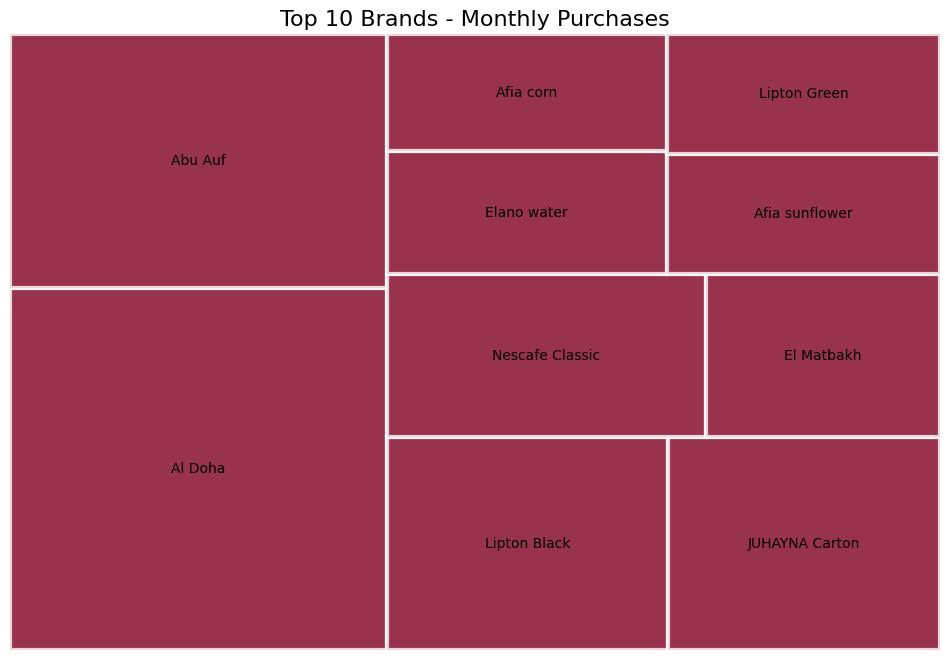

In [21]:
#Treemap
import squarify
import matplotlib.pyplot as plt


brand_sales = df.groupby('Brand')['Monthly_Purchases'].sum().sort_values(ascending=False)

top10 = brand_sales.head(10)

plt.figure(figsize=(12,8))

squarify.plot(
    sizes=top10.values,
    label=top10.index,
    color=['#800020'] * len(top10),  
    alpha=0.8,
    edgecolor='white',      
    linewidth=3           
)

plt.title('Top 10 Brands - Monthly Purchases', fontsize=16)
plt.axis('off')
plt.show()

-- This barplot highlights the top 10 products with the highest total monthly purchases, showing which items are the most popular.

C:\Users\LeaderTech\AppData\Local\Temp\ipykernel_11924\4238934796.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


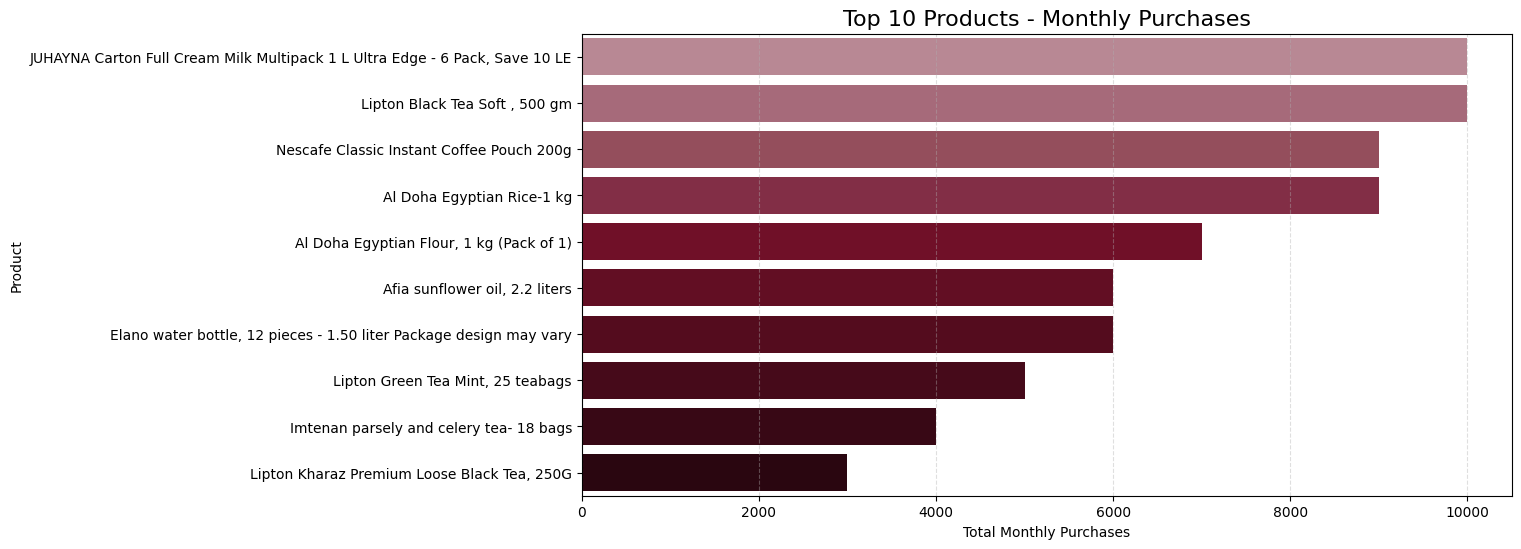

In [22]:
product_sales = (
    df.groupby("Product_Name")["Monthly_Purchases"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

burgundy_palette = ["#C08090", "#B06075", "#A04255", "#902040", "#800020",
                    "#70001C", "#600018", "#500015", "#400012", "#30000E"]

plt.figure(figsize=(12,6))
sns.barplot(
    x=product_sales.values,
    y=product_sales.index,
    palette=burgundy_palette
)

plt.title("Top 10 Products - Monthly Purchases", fontsize=16)
plt.xlabel("Total Monthly Purchases")
plt.ylabel("Product")
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()

Model

 Target Created

✅ Model: Logistic Regression
Accuracy: 0.6306451612903226

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75       382
           1       0.57      0.16      0.25       238

    accuracy                           0.63       620
   macro avg       0.60      0.54      0.50       620
weighted avg       0.61      0.63      0.56       620



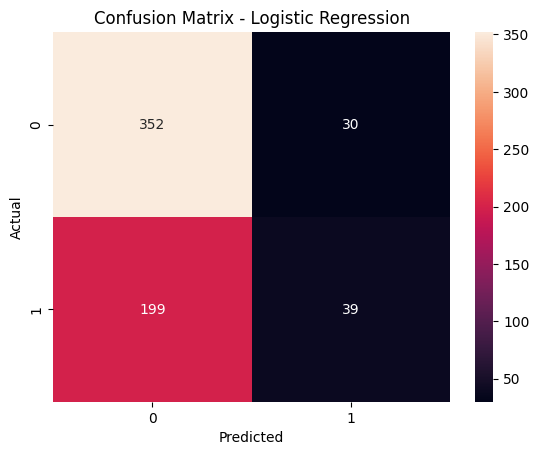


✅ Model: Random Forest
Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75       382
           1       0.58      0.31      0.41       238

    accuracy                           0.65       620
   macro avg       0.63      0.59      0.58       620
weighted avg       0.63      0.65      0.62       620



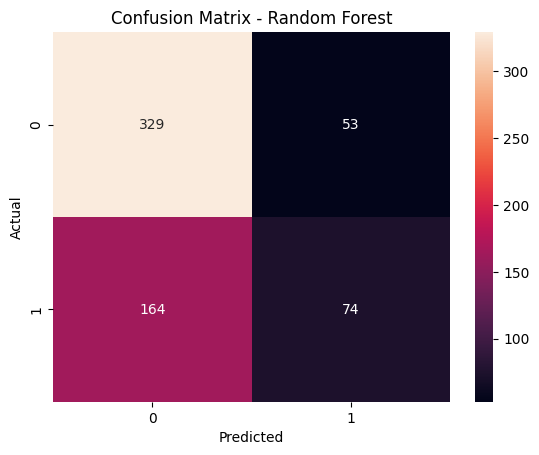

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Uni_Projects\Mehodology_Project\Cleaned_Data.csv")


median_sales = df['Monthly_Purchases'].median()

df['Sales_Class'] = df['Monthly_Purchases'].apply(
    lambda x: 1 if x > median_sales else 0
)



print(" Target Created")


X = df[['Price', 'Ratings', 'Brand']]
y = df['Sales_Class']


preprocessor = ColumnTransformer(
    transformers=[
        ('brand', OneHotEncoder(handle_unknown='ignore'), ['Brand'])
    ],
    remainder='passthrough'
)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        random_state=42
    )
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    print("\n✅ Model:", name)
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Machine Learning Model
In this part of the project, I built a machine learning model to classify products into two classes based on their monthly purchases. The target variable (Sales_Class) was created by comparing each product’s monthly purchases with the median value:
• 1 → High sales
• 0 → Low sales
Feature Selection
I selected the following features for the model:
• Price
• Ratings
• Brand
The Brand column was encoded using OneHotEncoder inside a preprocessing pipeline.
Models Used
I trained and evaluated two different classification models:
1. Logistic Regression
2. Random Forest Classifier
Both models were trained using a train–test split of 80/20 and wrapped in a preprocessing pipeline to ensure consistent encoding.
Model Evaluation
The main evaluation metrics used were:
• Accuracy
• Precision
• Recall
• F1-score
• Confusion matrix
Model Results
1. Logistic Regression
• Accuracy: 0.63
• Performance Insights:
o Strong performance on class 0 (Low Sales) with high recall (0.92).
o Weak performance on class 1 (High Sales) with low recall (0.16).
o The model tends to classify most products as low sales.
2. Random Forest Classifier
• Accuracy: 0.65
• Performance Insights:
o Better overall accuracy compared to Logistic Regression.
o Good performance on class 0 (Low Sales) with recall of 0.86.
o Improved but still moderate performance on class 1 (High Sales) with recall of 0.31.
o Handles feature interactions better due to its non-linear structure.
Final Output
Both models were successfully trained and evaluated. Random Forest achieved higher accuracy and generally more balanced results compared to Logistic Regression, especially in identifying high-sales products. These results provide a strong foundation for further improvement through feature engineering, additional models, or hyperparameter tuning.